In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from nltk.corpus import stopwords
import seaborn as sns

In [2]:
df = pd.read_csv("mabel.txt",header=None,on_bad_lines="skip",encoding='utf8')


In [3]:
df=df.drop(0)# drop first column
df.columns=['Date','Chat']# name the column
Message=df["Chat"].str.split("-",n=1,expand=True)#split time
df["Time"]=Message[0]
Message1=Message[1].str.split(":",n=1,expand=True)# split chat
df["Name"]=Message1[0]
df["Chat"]=Message1[1]
df=df[["Date","Time","Name","Chat"]]# rename in order
df

,Date,Time,Name,Chat
1,05/12/19,1:42 pm,Mabel Infoziant,Hi this is Mabel we just spoke
2,05/12/19,1:42 pm,Mabel Infoziant,What’s your full name
3,05/12/19,1:42 pm,AR❤,Ramisha Rani K
4,05/12/19,1:42 pm,Mabel Infoziant,Ok
5,05/12/19,1:42 pm,Mabel Infoziant,ramisharanik@gmail.com
6,05/12/19,1:43 pm,Mabel Infoziant,Your email Id?
7,05/12/19,1:43 pm,AR❤,Yes Mam
8,05/12/19,1:43 pm,Mabel Infoziant,I will send 2 abstracts for u to start working
9,05/12/19,1:43 pm,AR❤,Yeah mam
10,05/12/19,1:43 pm,Mabel Infoziant,Give me the list that u have too


# SENTIMENT ANALYSIS

In [4]:
df.dropna(inplace=True)

In [5]:
df.isnull().sum()

Date    0
Time    0
Name    0
Chat    0
dtype: int64

In [6]:
 sid = SentimentIntensityAnalyzer()

In [40]:
 def sentimentalAnalysis(df,columnname):
        df['scores'] = df[columnname].apply(lambda commentText: sid.polarity_scores(commentText))
        df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])
        df['Negtive']  = df['scores'].apply(lambda score_dict: score_dict['neg'])
        df['Postive']  = df['scores'].apply(lambda score_dict: score_dict['pos'])
        df['Neutral']  = df['scores'].apply(lambda score_dict: score_dict['neu'])
        
        "Creating final pos or neg using compound score"
        df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
        plt.clf()
        "Checking how many pos and neg"
        posneg=pd.DataFrame(df['comp_score'].value_counts())
        # Classifying the messages as 'Flirt' if compound score is greater than 0.5, else 'Non-Flirt'
        df['MessageType'] = df['compound'].apply(lambda fb: 'Flirt' if fb > 0.5 else 'Non-Flirt')
    
        # Counting the number of 'Flirt' and 'Non-Flirt' messages
        Message_type = df['MessageType'].value_counts()
    
        return posneg,df,Message_type

In [41]:
posneg,Message_type,df_senti= sentimentalAnalysis(df,columnname='Chat')

<Figure size 640x480 with 0 Axes>

In [43]:
df_senti

Non-Flirt    45
Flirt         5
Name: MessageType, dtype: int64

In [44]:
Message_type

,Date,Time,Name,Chat,scores,compound,Negtive,Postive,Neutral,comp_score,MessageType
1,05/12/19,1:42 pm,Mabel Infoziant,Hi this is Mabel we just spoke,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos,Non-Flirt
2,05/12/19,1:42 pm,Mabel Infoziant,What’s your full name,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos,Non-Flirt
3,05/12/19,1:42 pm,AR❤,Ramisha Rani K,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos,Non-Flirt
4,05/12/19,1:42 pm,Mabel Infoziant,Ok,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.2960,0.000,1.000,0.000,pos,Non-Flirt
5,05/12/19,1:42 pm,Mabel Infoziant,ramisharanik@gmail.com,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos,Non-Flirt
6,05/12/19,1:43 pm,Mabel Infoziant,Your email Id?,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos,Non-Flirt
7,05/12/19,1:43 pm,AR❤,Yes Mam,"{'neg': 0.0, 'neu': 0.27, 'pos': 0.73, 'compou...",0.4019,0.000,0.730,0.270,pos,Non-Flirt
8,05/12/19,1:43 pm,Mabel Infoziant,I will send 2 abstracts for u to start working,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos,Non-Flirt
9,05/12/19,1:43 pm,AR❤,Yeah mam,"{'neg': 0.0, 'neu': 0.312, 'pos': 0.688, 'comp...",0.2960,0.000,0.688,0.312,pos,Non-Flirt
10,05/12/19,1:43 pm,Mabel Infoziant,Give me the list that u have too,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos,Non-Flirt


In [23]:
posneg

,comp_score
pos,48
neg,2


# POSITIVE AND NEGATIVE COUNT

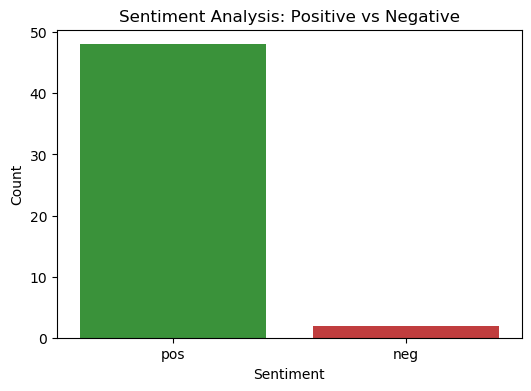

In [26]:
# Plotting the bar chart for sentiment count (pos and neg)
plt.figure(figsize=(6, 4))
sns.barplot(x=pos.index, y=pos['comp_score'], palette=['#2ca02c', '#d62728'])

# Adding title and labels
plt.title('Sentiment Analysis: Positive vs Negative')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Display the plot
plt.show()

# FLIRT VS NON - FLIRT

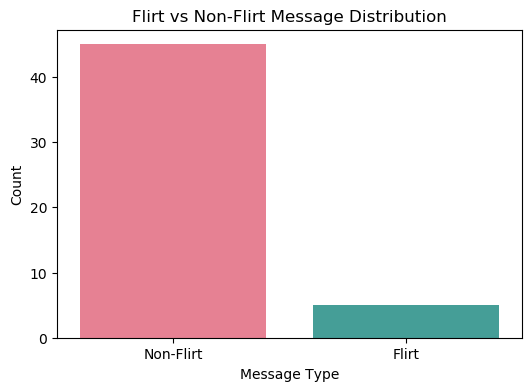

In [60]:
plt.figure(figsize=(6, 4))
sns.barplot(x=df_senti.index, y=df_senti.values, palette='husl')

# Adding title and labels
plt.title('Flirt vs Non-Flirt Message Distribution')
plt.xlabel('Message Type')
plt.ylabel('Count')

# Display the plot
plt.show()

# TALKATIVE COUNTS

In [56]:
talkative = df['Name'].value_counts()
talkative

 AR❤                27
 Mabel Infoziant    23
Name: Name, dtype: int64

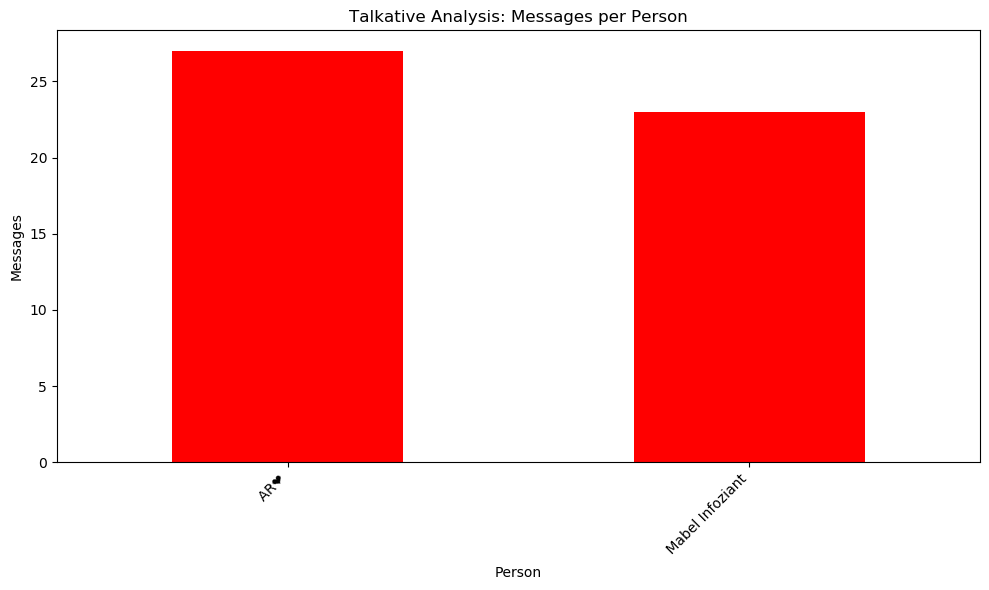

In [59]:
plt.figure(figsize=(10, 6))
talkative.plot(kind='bar', color='red')
plt.title('Talkative Analysis: Messages per Person')
plt.xlabel('Person')
plt.ylabel('Messages')
plt.xticks(rotation=45, ha='right')  # Rotate names for readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

# ACTIVE DATE AND ACTIVE TIME

In [62]:
active_day = df['Date'].value_counts().sort_index()

In [65]:
active_day.idxmax()

'05/12/19'

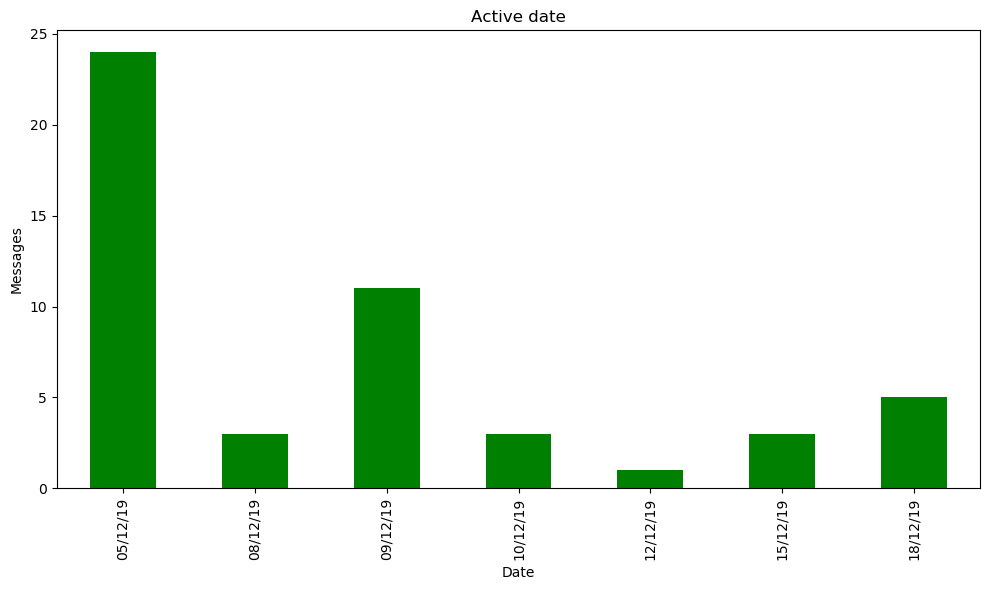

In [69]:
plt.figure(figsize=(10, 6))
active_day.plot(kind='bar', color='green')
plt.title('Active date')
plt.xlabel('Date')
plt.ylabel('Messages')
plt.tight_layout()  
plt.show()

In [71]:
active_time = df['Time'].value_counts().sort_index()
active_time.idxmax()

' 1:43 pm '

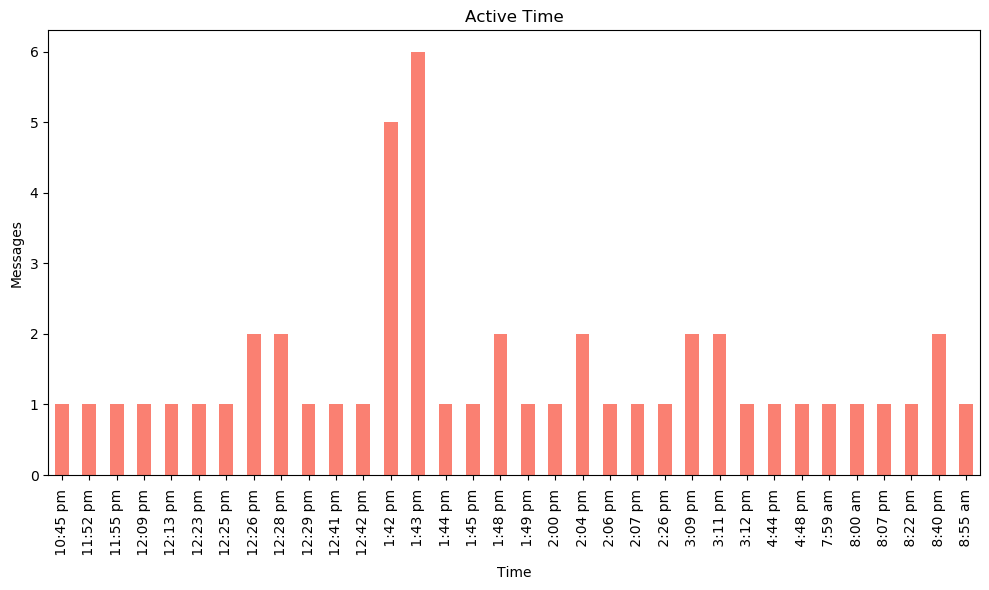

In [74]:
plt.figure(figsize=(10, 6))
active_time.plot(kind='bar', color='salmon')
plt.title('Active Time')
plt.xlabel('Time')
plt.ylabel('Messages')
plt.tight_layout()  
plt.show()

# TOPIC MODELLING

In [75]:
# conversion
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF

# Applying CountVectorizer
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = count_vectorizer.fit_transform(df["Chat"])

# Applying NMF for topic modeling
nmf_model = NMF(n_components=5, random_state=42)
nmf_model.fit(dtm)

# Print the top words for each topic
for index, topic in enumerate(nmf_model.components_):
    results = [count_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
    print(results)

# Assign topics to the documents
topic_results = nmf_model.transform(dtm)
df["Topic"] = topic_results.argmax(axis=1)

# Display the updated dataframe with assigned topics
df

# Count the number of documents in each topic
df["Topic"].value_counts()


['finiliaze', 'soon', 'ask', 'ok', 'sure', 'yeah', 'kk', 'read', 'abstract', 'mam']
['hi', 'need', 'share', 'know', 'ask', 'send', 'students', 'phone', 'number', 'office']
['ask', 'abstracts', 'number', 'mam', 'hi', 'church', 'office', 'know', 'just', 'tomorrow']
['students', 'meeting', 'ramisha', 'know', 'sure', 'yes', 'soon', 'share', 'need', 'details']
['finiliaze', 'number', 'ml', 'start', 'abstracts', 'details', 'ask', 'think', 'send', 'vignesh']


C:\Anaconda\envs\aiml\lib\site-packages\sklearn\decomposition\_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


0    28
4     9
3     6
2     5
1     2
Name: Topic, dtype: int64

# MODEL CREATION

In [77]:
df

,Date,Time,Name,Chat,scores,compound,Negtive,Postive,Neutral,comp_score,MessageType,Topic
1,05/12/19,1:42 pm,Mabel Infoziant,Hi this is Mabel we just spoke,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos,Non-Flirt,2
2,05/12/19,1:42 pm,Mabel Infoziant,What’s your full name,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos,Non-Flirt,0
3,05/12/19,1:42 pm,AR❤,Ramisha Rani K,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos,Non-Flirt,3
4,05/12/19,1:42 pm,Mabel Infoziant,Ok,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.2960,0.000,1.000,0.000,pos,Non-Flirt,0
5,05/12/19,1:42 pm,Mabel Infoziant,ramisharanik@gmail.com,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos,Non-Flirt,0
6,05/12/19,1:43 pm,Mabel Infoziant,Your email Id?,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos,Non-Flirt,0
7,05/12/19,1:43 pm,AR❤,Yes Mam,"{'neg': 0.0, 'neu': 0.27, 'pos': 0.73, 'compou...",0.4019,0.000,0.730,0.270,pos,Non-Flirt,0
8,05/12/19,1:43 pm,Mabel Infoziant,I will send 2 abstracts for u to start working,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos,Non-Flirt,4
9,05/12/19,1:43 pm,AR❤,Yeah mam,"{'neg': 0.0, 'neu': 0.312, 'pos': 0.688, 'comp...",0.2960,0.000,0.688,0.312,pos,Non-Flirt,0
10,05/12/19,1:43 pm,Mabel Infoziant,Give me the list that u have too,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos,Non-Flirt,0


In [78]:
x= df["Chat"]
y = df["MessageType"]

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=53)

In [81]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import PassiveAggressiveClassifier

In [82]:
cv = CountVectorizer(stop_words='english')
x_train = cv.fit_transform(x_train)
x_test = cv.transform(x_test)


In [84]:
len(cv.get_feature_names_out())

86

In [85]:
print(x_train.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [87]:
from sklearn import metrics
clf = MultinomialNB()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test,y_pred)
print("Accuracy : %0.3f" % acc)

Accuracy : 0.882


In [88]:
svc = SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
acc= metrics.accuracy_score(y_test,y_pred)
print("Accuracy : %0.3f" % acc)

Accuracy : 0.882


In [89]:
pac = PassiveAggressiveClassifier(max_iter = 1000,random_state = 42)
pac.fit(x_train,y_train)
y_pred = pac.predict(x_test)
acc= metrics.accuracy_score(y_test,y_pred)
print("Accuracy : %0.3f" % acc)

Accuracy : 0.765


In [90]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
acc= metrics.accuracy_score(y_test,y_pred)
print("Accuracy : %0.3f" % acc)

Accuracy : 0.882


In [92]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

[[ 0  2]
 [ 0 15]]
              precision    recall  f1-score   support

       Flirt       0.00      0.00      0.00         2
   Non-Flirt       0.88      1.00      0.94        15

    accuracy                           0.88        17
   macro avg       0.44      0.50      0.47        17
weighted avg       0.78      0.88      0.83        17



C:\Anaconda\envs\aiml\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\envs\aiml\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\envs\aiml\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


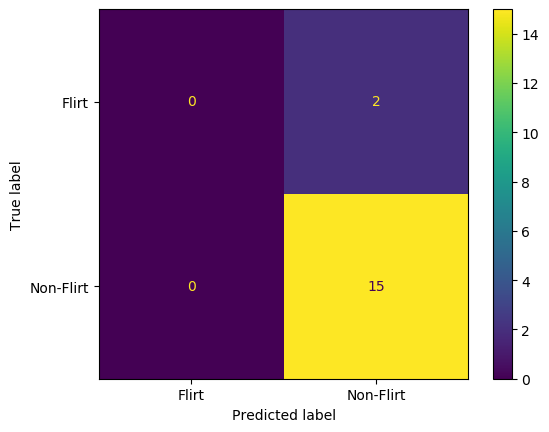

In [93]:
clf_rep = classification_report(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(clf_rep)
cmd = ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

# WORD CLOUD

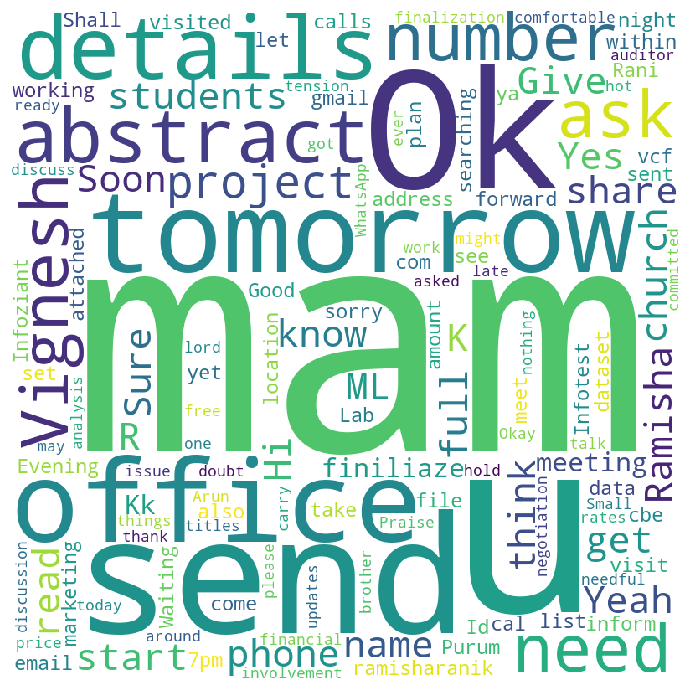

Successfully created


In [94]:
# Prepare stopwords
stoplist = set(stopwords.words('english') + ['omitted', 'voice', 'missed', 'call', 'video', 'deleted', 'media', 'message'])

# Combine all chat text (skipping first if needed)
text = " ".join(df['Chat'].iloc[1:].astype(str))

# Generate and display word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stoplist, min_font_size=10).generate(text)

plt.figure(figsize=(9, 7))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout()
plt.savefig('wordcloud.PNG')
plt.show()

print("Successfully created")